# Programming Project 1 Justin Broce

In [1]:
using Plots
include("project1.jl")

lugauss (generic function with 1 method)

In [2]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9
fprime(x) = -221 + 18x + 54x^2 + 920x^3

fprime (generic function with 1 method)

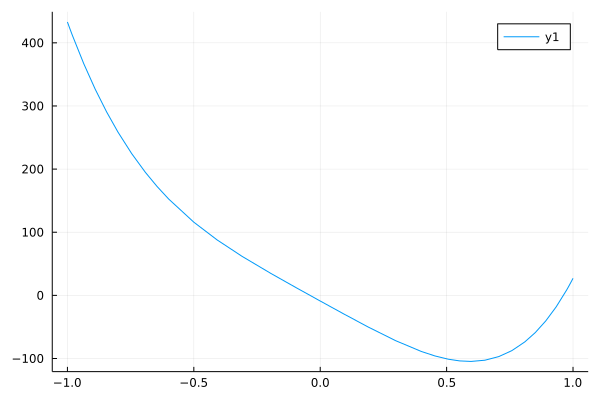

In [56]:
plot(f,xlims=[-1,1])

Seeing the plot, I chose -.5 and .7 as initial guesses for x, for f(x)=0

In [55]:
secant(f,-0.5,0,10^(-6.),20)
secant(f,0.7,1,10^(-6.),20)

p is -0.04065928831575845 and the iteration number is 4
p is 0.962398418640793 and the iteration number is 5


In [54]:
newton(f, fprime, -.5, 10^(-6.), 20)
newton(f, fprime, .7, 10^(-6.), 20)

p is -0.04065928831575899 and the iteration number is 4
p is 0.9623984187505414 and the iteration number is 7


In [ ]:
We can now see that the zeros are at x= -0.04065928831575899  and x = 0.9623984187505414 

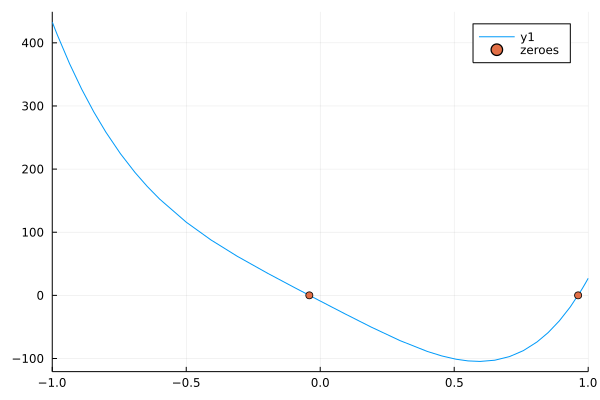

In [5]:
x=[-0.04065928831575845,0.9623984187507943]
plot(f, xlims=(-1,1))
scatter!(x,f.(x),label=["zeroes" "."])


## Problem 2

In [2]:
@variables ε
A = [2 -2 0; ε-2 2 0; 0 -1 3]
lugauss(A)
A

3×3 Matrix{Num}:
                 2    -2        0
 (1//2)*ε - (1//1)     ε        0
                 0.0  -1.0 / ε  3.0

After calculating the lu factorization of A we can see that

In [17]:
L = [1 0 0; ε/2-1 1 0; 0 -1/ε 1]

3×3 Matrix{Num}:
            1       0  0
 (1//2)*ε - 1       1  0
            0  -1 / ε  1

In [18]:
U = [2 -2 0; 0 ε 0; 0 0 3]

3×3 Matrix{Num}:
 2  -2  0
 0   ε  0
 0   0  3

We can see that 
$$l_{32} = -1.0/ε \hspace{2 mm}, \hspace{2 mm}and \hspace{1 mm}\lim_{ε \to 0} -1.0/ε \hspace{2 mm}= \hspace{2 mm} \infty $$ 

Looking at the errors when ε = 10^−k with k = 0,..,9 and b = (0,ε,2)T


In [44]:
xex=ones(3,1)
error = []
for k in 1:10
    e = 10.0^-k
    b = [0, e, 2]
    L =[1 0 0; e/2-1 1 0; 0 -1/e 1]
    U = [2 -2 0; 0 e 0; 0 0 3]
    y=L\b; 
    x=U\y; 
    push!(error, norm(x-xex)/norm(xex))
end
print(error)


Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]4.242640687119285e10

Looking at the errors when ε = 3* 10^−k with k = 0,..,9 and  b=[2*log(5/2)-2,(e-2)*log(5/2)+2,2]

In [46]:
xex=[log(5/2),1,1]
error = []
for k in 1:9
    e = 1/3*10.0^-k
    b=[2*log(5/2)-2,(e-2)*log(5/2)+2,2]
    L =[1 0 0; e/2-1 1 0; 0 -1/e 1]
    U = [2 -2 0; 0 e 0; 0 0 3]
    y=L\b; 
    x=U\y; 
    push!(error, norm(x-xex)/norm(xex))
    
end
print(error)


Any[5.532719612753531e-15, 2.7176650800456076e-14, 9.496701336611084e-14, 1.3409650298693084e-12, 1.2828300431125072e-11, 4.872622356190387e-11, 4.571864719425606e-9, 4.262366305672778e-8, 2.867295403463804e-7]1.2727922061357855e10

we can see that sthe error relies on the condition number of A, which abides by the law K(A) = C/ε and fulfills the estimate.